<a href="https://colab.research.google.com/github/mdadilmuzaffar24/Autism_Predicition_ML_project/blob/main/Autism_Predicition_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset
ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool.

age - Age of the patient in years.

gender - Gender of the patient.

ethnicity - Ethnicity of the patient.

jaundice - Whether the patient had jaundice at the time of birth.

autism - Whether an immediate family member has been diagnosed with autism.

contry_of_res - Country of residence of the patient.

used_app_before - Whether the patient has undergone a screening test before.

result - Score for AQ1-10 screening test.

age_desc - Age of the patient.

relation - Relation of patient who completed the test.

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes.

# 1. **Importing the dependencies**

In [179]:
# For numerical operations
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To convert categorical data into numeric labels
from sklearn.preprocessing import LabelEncoder

# To handling class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Model selection tools
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb


# Evaluation metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# For saving and loading trained models
import pickle
import joblib

# 2. **Data Loading & Understanding**

In [180]:
# Read CSV to pandas DataFrame
df = pd.read_csv('/content/Autism Dataset (Kaggel).csv')

2.1 Initial inspection on dataset

In [181]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

In [182]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [183]:
df.shape

(800, 22)

In [184]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [186]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [187]:
# Round the 'age' column values and convert them to integer type
df["age"] = df["age"].round().astype(int)

In [188]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,48,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1


In [189]:
# Display unique values for all non-numerical columns to understand the categorical data,
# which helps in identifying values that may need encoding or cleaning.
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [190]:
# dropping ID & age_desc column
df = df.drop(columns=["ID", "age_desc"])

In [191]:
df.shape

(800, 20)

In [192]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [193]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [194]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [195]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [196]:
#checking target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights:**
1. missing values in ethnicity & relation
2. age_desc column has only 1 unique value. so age_desc & ID removed as it is not important for prediction
3. fixed country names
4. identified class imbalance in the target column

# **3. Exploratory Data Analysis (EDA)**

In [197]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.442500,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.300117,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,25.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


 Key Insights from Descriptive Statistics:

| Feature   | Mean      | Std Dev | Min       | 25%  | 50%    | 75%   | Max   | Comment                                                              |
| --------- | --------- | ------- | --------- | ---- | ------ | ----- | ----- | -------------------------------------------------------------------- |
| A1 to A10 | \~0.3–0.6 | \~0.49  | 0         | 0    | 0 or 1 | 1     | 1     | **Binary (0/1)** questions, perfectly clean.                         |
| age       | 28.44     | 16.30   | 3         | 17   | 25     | 36    | 89    | Looks reasonable. No immediate need to clip unless modeling says so. |
| result    | 8.53      | 4.80    | **-6.13** | 5.30 | 9.60   | 12.51 | 15.85 | ❗ Has **negative value** — needs attention!                          |
| Class/ASD | 0.201     | 0.40    | 0         | 0    | 0      | 0     | 1     | Target variable is **binary**, clean.                                |


#3.1 **Univariate Analysis**

3.1.1 Numerical Columns:
- age
- result

In [198]:
# seting the theme for plots
sns.set_theme(style="darkgrid")

Mean: 28.4425
Median: 25.0


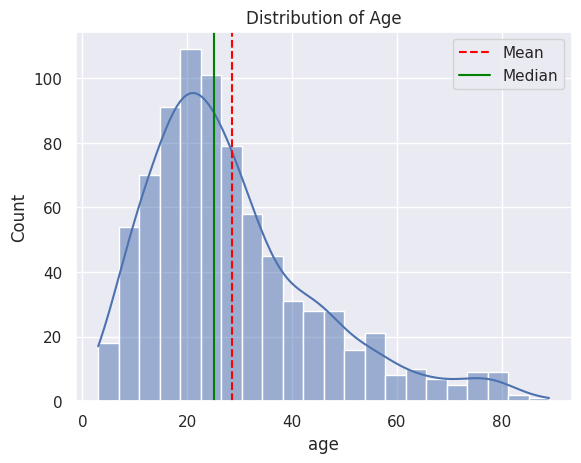

In [199]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculating mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# adding vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


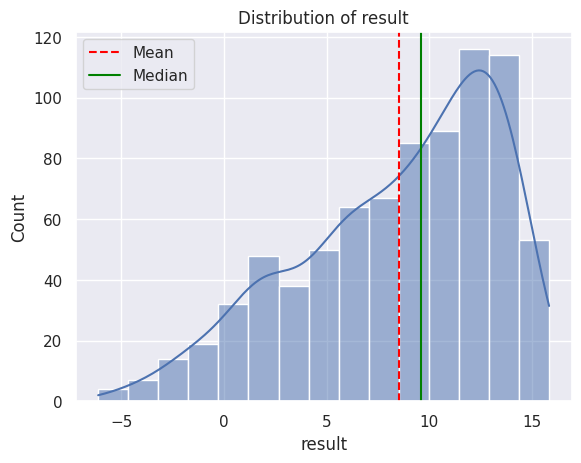

In [200]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculating mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# adding vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Plotting box plot to identify the outliers in the numeric column

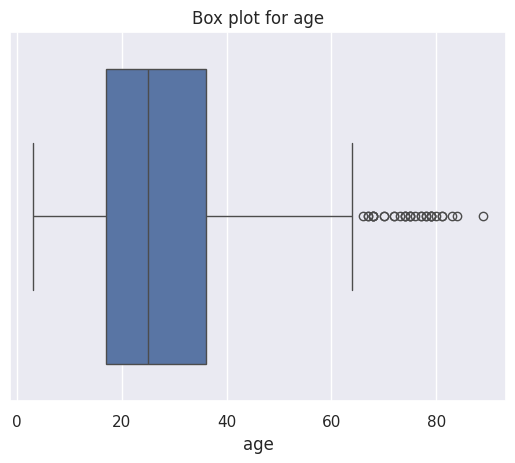

In [201]:
#Box plot for age
sns.boxplot(x = df["age"])
plt.title("Box plot for age")
plt.xlabel("age")
plt.show()

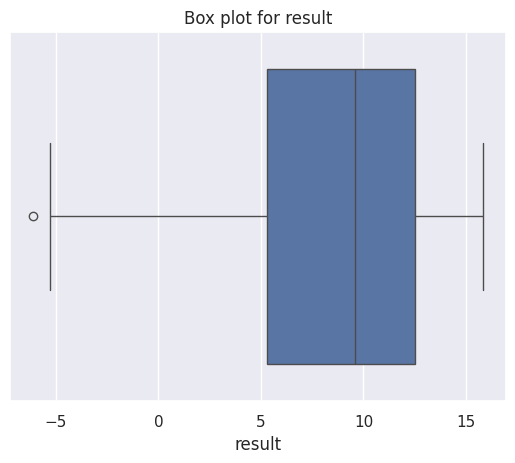

In [202]:
#Box plot for result
sns.boxplot(x = df["result"])
plt.title("Box plot for result")
plt.xlabel("result")
plt.show()

In [203]:
# counting the outliers using IQR method for age
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [204]:
len(age_outliers)

33

In [205]:
# counting the outliers using IQR method for result
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [206]:
len(result_outliers)

1

3.1.2 Categorical columns:

In [207]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

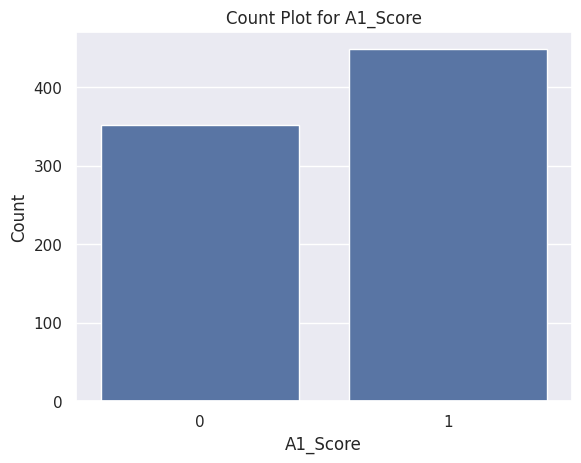

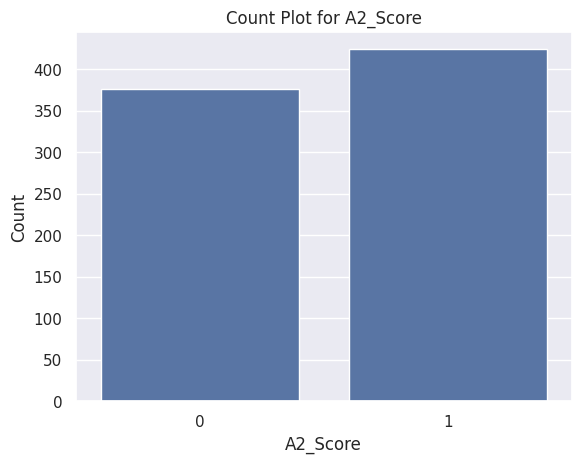

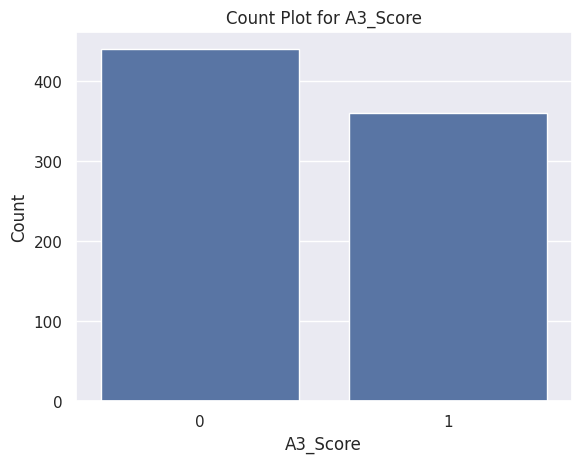

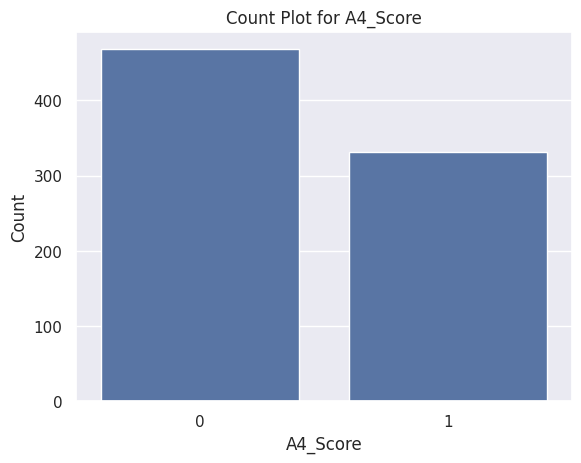

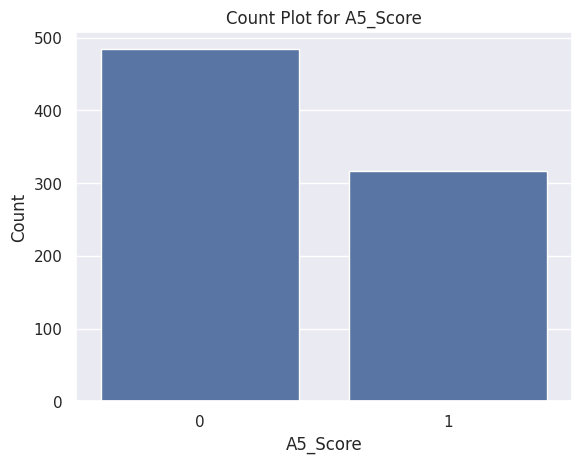

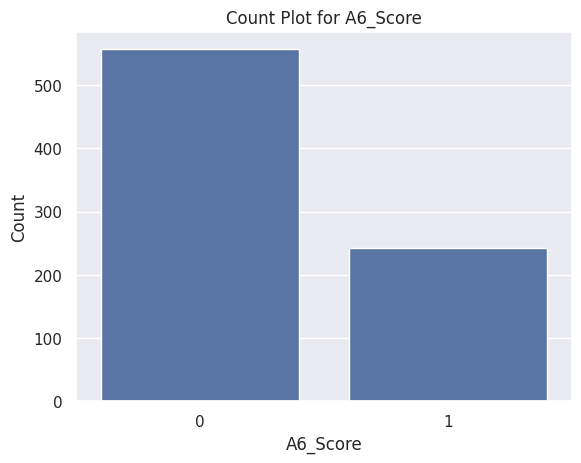

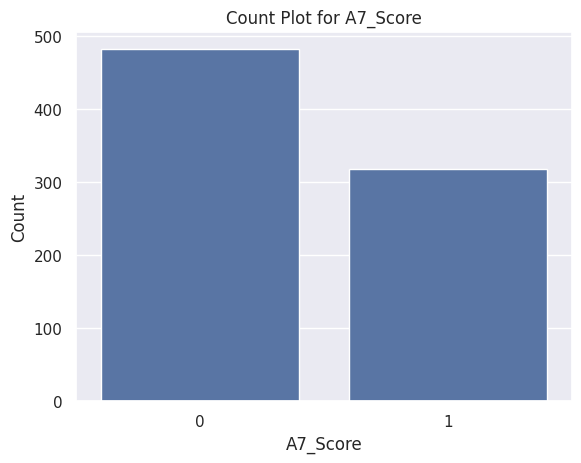

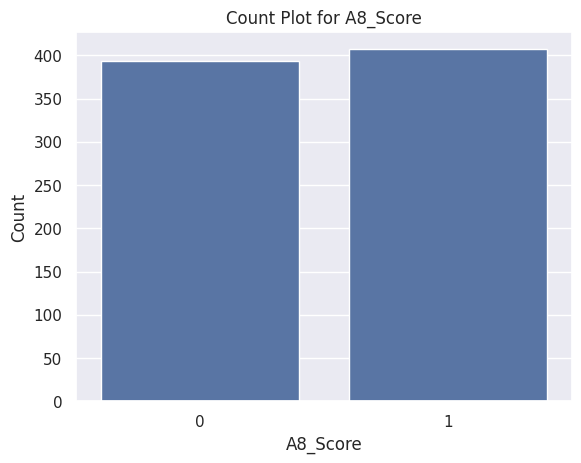

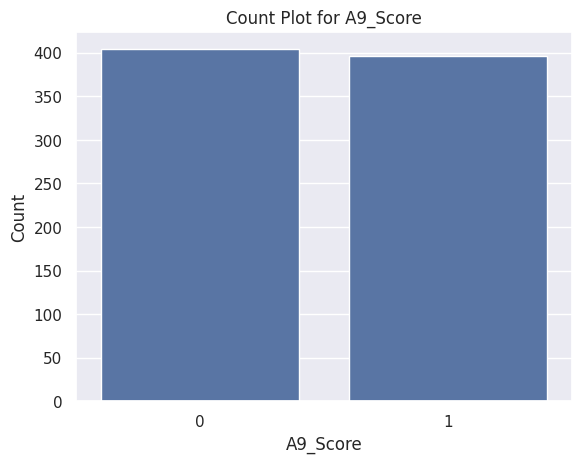

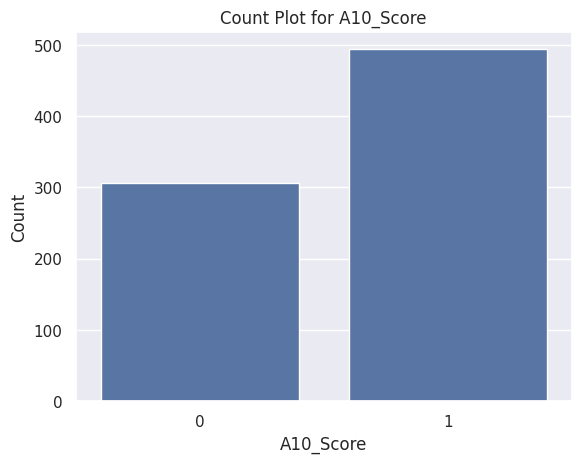

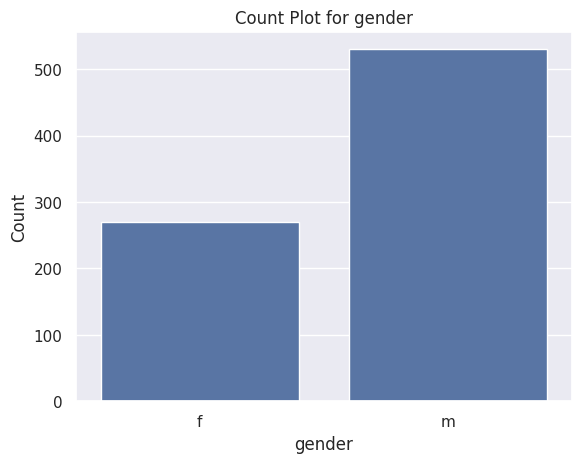

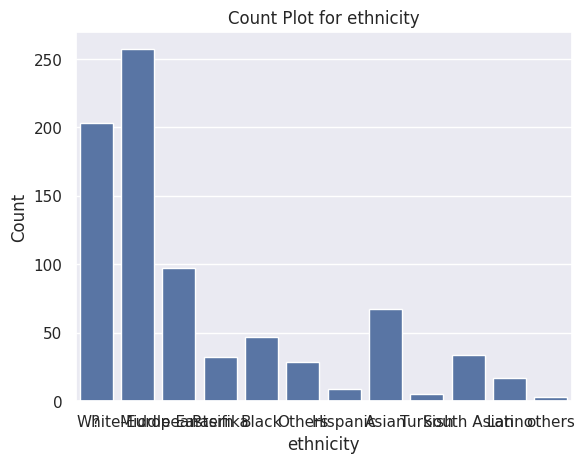

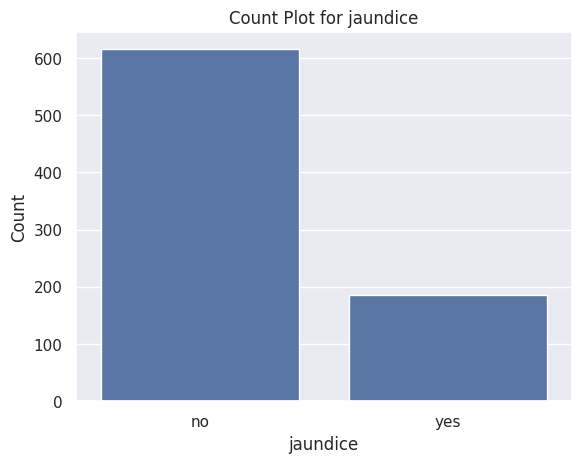

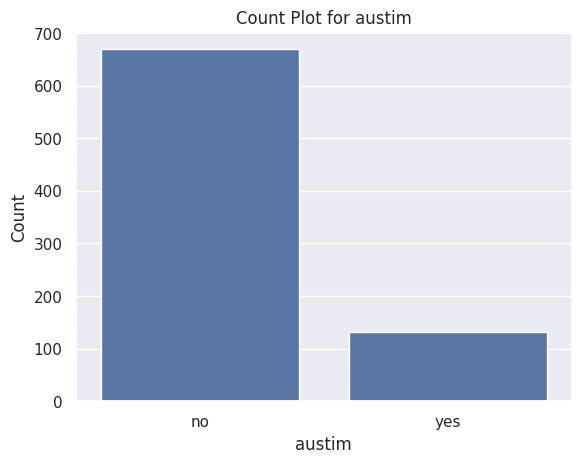

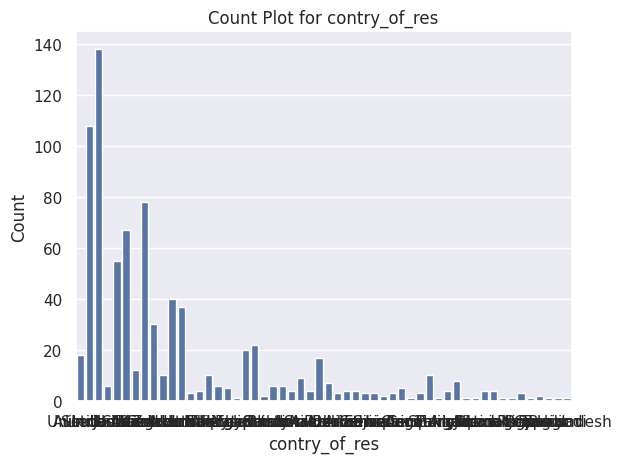

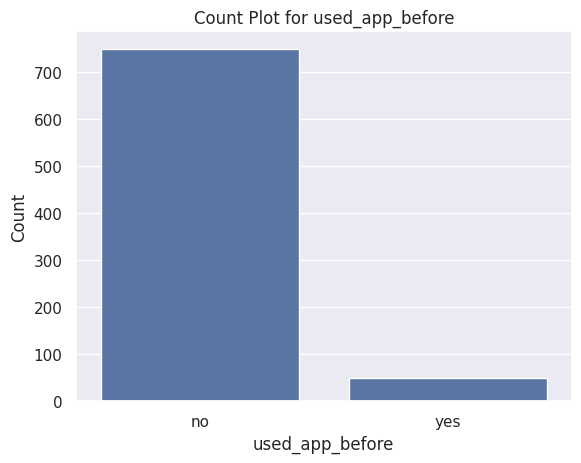

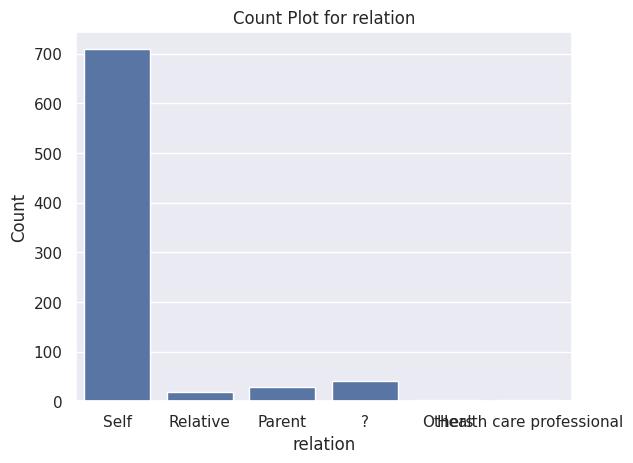

In [208]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

# Generating count plots for all categorical columns to visualize the distribution of values in each feature.
for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

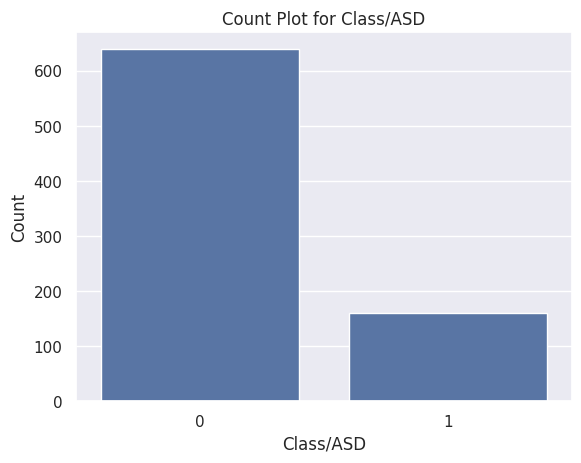

In [209]:
# Count plot for target column(class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [210]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


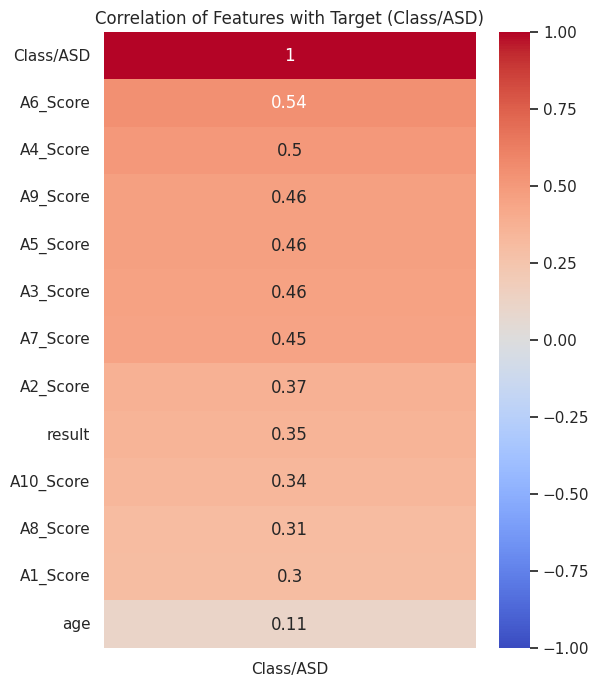

In [211]:
# Computing correlation matrix for Class/ASD
corr_matrix = df.corr(numeric_only=True)

# Extracting correlation of all features with the target variable
target_corr = corr_matrix[['Class/ASD']].sort_values(by='Class/ASD', ascending=False)

# Plot heatmap for correlations with target
plt.figure(figsize=(6, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Target (Class/ASD)")
plt.show()

Top Correlated Features:

| Feature                            | Correlation | Insight                                                                                      |
| ---------------------------------- | ----------- | -------------------------------------------------------------------------------------------- |
| `A6_Score`                         | **0.54**    | Strongest predictor—highly associated with ASD.                                              |
| `A4_Score`                         | 0.50        | Also strongly correlated.                                                                    |
| `A9_Score`, `A5_Score`, `A3_Score` | \~0.46      | Moderately strong predictors.                                                                |
| `result`                           | 0.35        | This variable (possibly a quiz/test score) has a meaningful relationship with ASD diagnosis. |
| `age`                              | **0.11**    | Weak correlation; age has minimal predictive power.                                          |


Handling missing values in ethnicity and relation column

In [212]:
df["ethnicity"] = df["ethnicity"].replace({'?': 'Others' , 'others': 'Others'})

In [213]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [214]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [215]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [216]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,48,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,24,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


# 3.2 Label Encoding

    calegorical --> numerical

In [217]:
# identifing column with object data type
object_columns = df.select_dtypes(include = ["object"]).columns

print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [218]:
encoders = {}

for column in object_columns:
    try:
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        encoders[column] = label_encoder
    except Exception as e:
        print(f"Error encoding {column}: {e}")

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [219]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [220]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,48,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,24,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


# 3.3 Bivariate Analysis

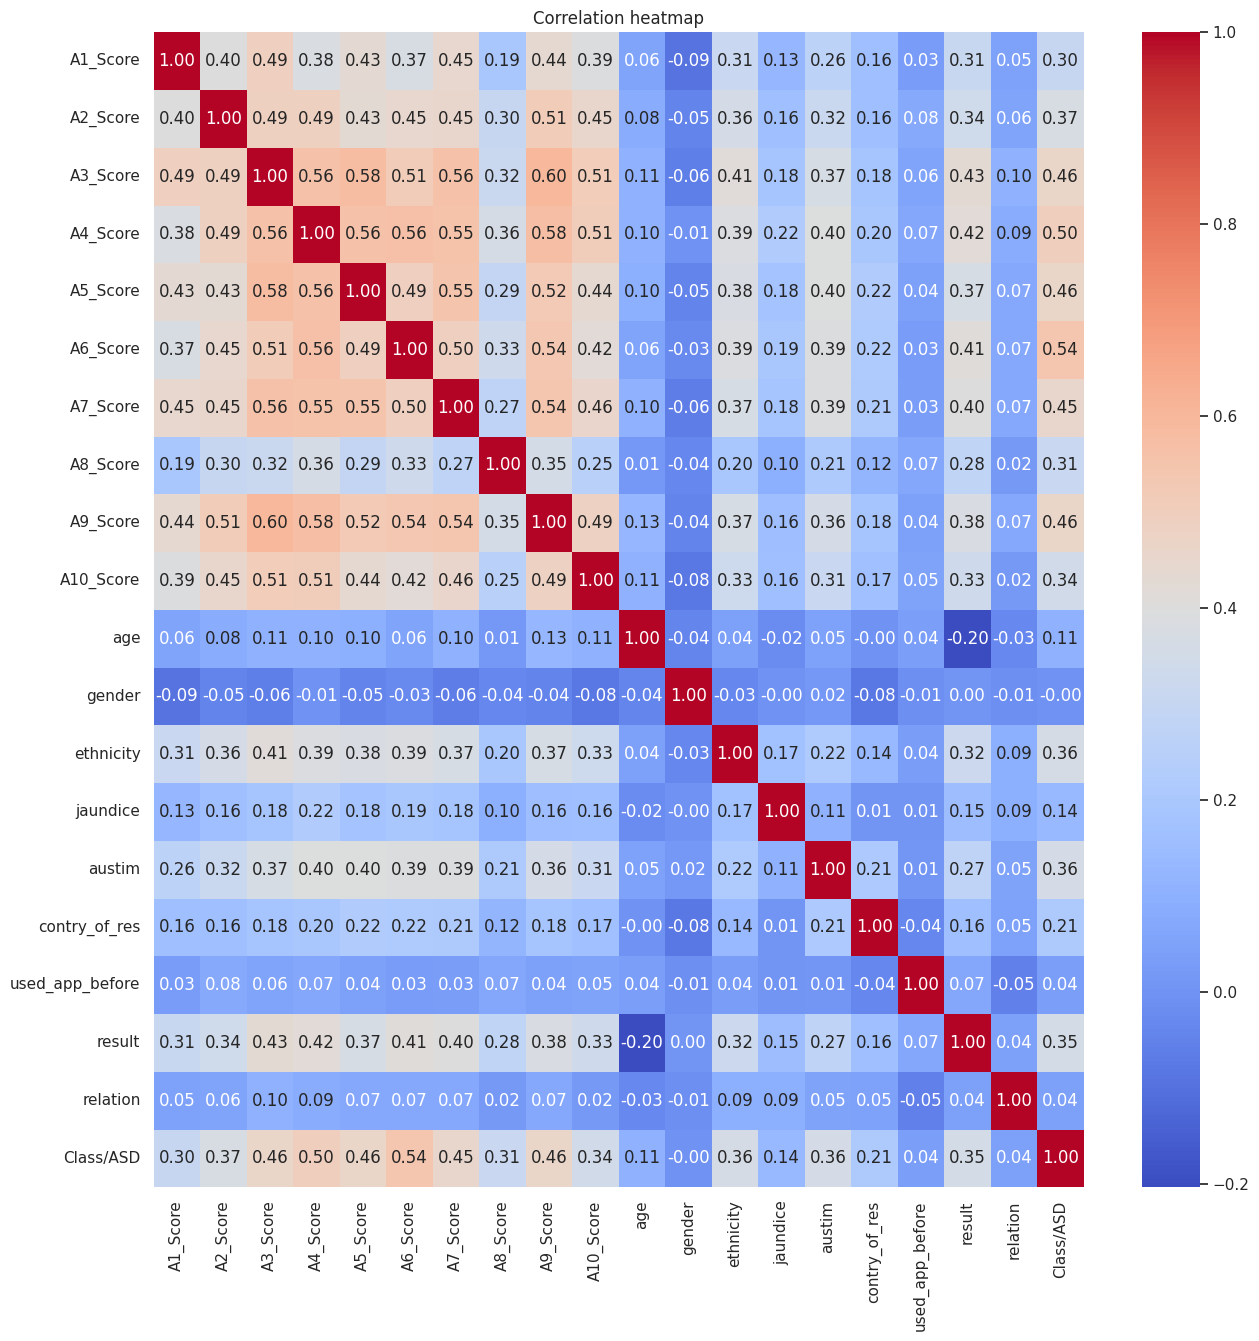

In [221]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**Insights from EDA:**

- There are few outliers in the numerical columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed label encoding and saved the encoders

# 4. Data Preprocessing

4.1 Handling the  outliers

In [222]:
def replace_outliers_with_median(df, column):
    df = df.copy()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df


In [223]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [224]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,48.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,24.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [225]:
df.shape

(800, 20)

4.2 Train Test Split

In [226]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [227]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

In [228]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [229]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [230]:
# Splitting the dataset into training and testing sets
# 80% of the data will be used for training (X_train, y_train)
# 20% will be used for testing (X_test, y_test)
# random_state=42 ensures the split is reproducible every time the code runs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [231]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [232]:
y_train.value_counts()

,count
Class/ASD,
0,511
1,129


In [233]:
y_test.value_counts()

,count
Class/ASD,
0,128
1,32


In [234]:
from imblearn.combine import SMOTETomek

# Initialize
smt = SMOTETomek(random_state=42)

# Resample only training data
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())


Class/ASD
0    504
1    504
Name: count, dtype: int64


In [235]:
pip install imbalanced-learn xgboost scikit-learn

In [236]:
print(y_train_resampled.shape)

(1008,)


In [237]:
print(y_train_resampled.value_counts())

Class/ASD
0    504
1    504
Name: count, dtype: int64


In [238]:
# Baseline Models

# Logistic Regression
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=4, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [239]:
# Predict on Test Set
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [240]:
# Collect Evaluation Metrics
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_pred)
    }

results = []
results.append(get_metrics(y_test, y_pred_log, "Logistic Regression"))
results.append(get_metrics(y_test, y_pred_rf, "Random Forest"))
results.append(get_metrics(y_test, y_pred_xgb, "XGBoost"))

In [241]:
# 4. Build a Comparison Table
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1-Score", ascending=False))

                 Model  Accuracy  Precision   Recall  F1-Score   ROC AUC
2              XGBoost   0.83750   0.568182  0.78125  0.657895  0.816406
1        Random Forest   0.80625   0.511628  0.68750  0.586667  0.761719
0  Logistic Regression   0.78125   0.468085  0.68750  0.556962  0.746094


In [242]:
# show classification report for more details
print("\nLogistic Regression Report\n")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Report\n")
print(classification_report(y_test, y_pred_rf))

print("\nXGBoost Report\n")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Report

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       128
           1       0.47      0.69      0.56        32

    accuracy                           0.78       160
   macro avg       0.69      0.75      0.71       160
weighted avg       0.82      0.78      0.80       160


Random Forest Report

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       128
           1       0.51      0.69      0.59        32

    accuracy                           0.81       160
   macro avg       0.71      0.76      0.73       160
weighted avg       0.83      0.81      0.82       160


XGBoost Report

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       128
           1       0.57      0.78      0.66        32

    accuracy                           0.84       160
   macro avg       0.75      0.82      0.78       160
weigh

In [243]:
# XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [3, 4, 5]  # because of imbalance
}

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_xgb = random_search.best_estimator_
print(random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}



Final Classification Report

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       128
           1       0.49      0.69      0.57        32

    accuracy                           0.79       160
   macro avg       0.70      0.75      0.72       160
weighted avg       0.83      0.79      0.81       160



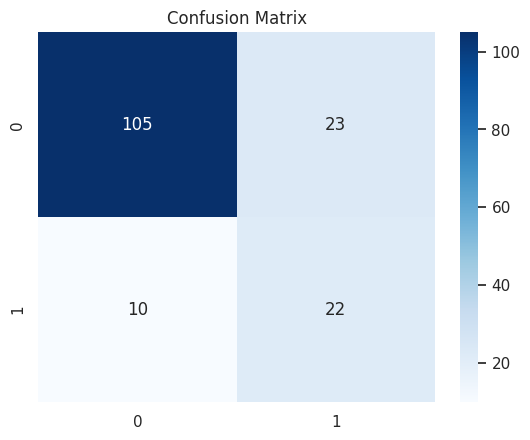

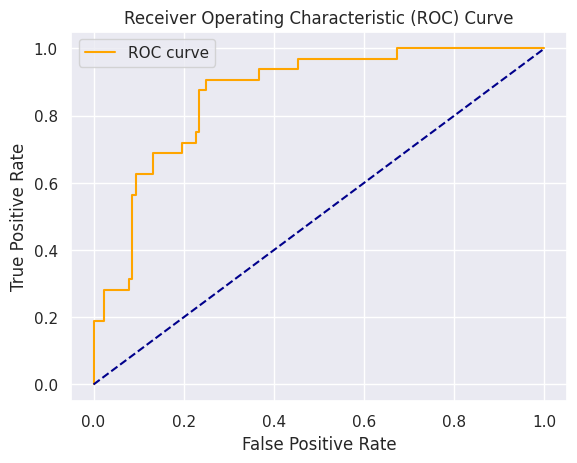

ROC AUC Score: 0.86279296875


In [244]:
# Predictions
final_preds = best_xgb.predict(X_test)

print("\nFinal Classification Report\n")
print(classification_report(y_test, final_preds))

sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, best_xgb.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:,1]))


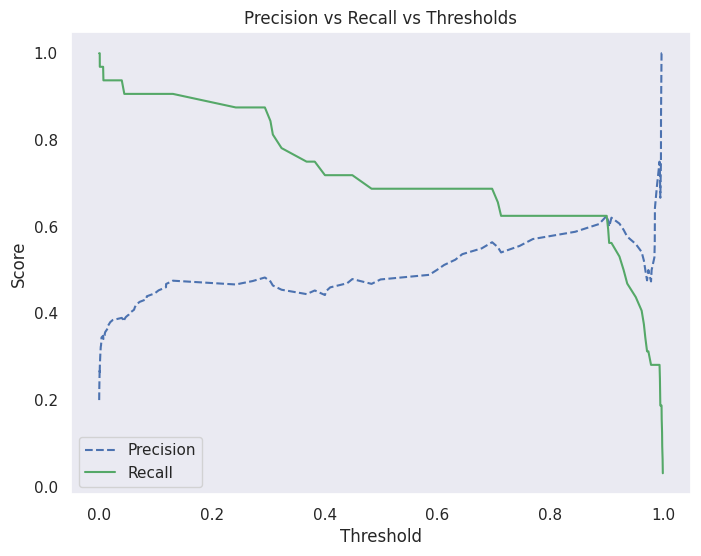

In [245]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get predicted probabilities
y_scores = best_xgb.predict_proba(X_test)[:, 1]

# 2. Find best threshold by plotting
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Thresholds")
plt.legend()
plt.grid()
plt.show()


In [246]:
# Choose threshold manually
optimal_threshold = 0.65

y_pred_custom = (y_scores >= optimal_threshold).astype(int)

# 3. Evaluation
print("Custom Threshold Evaluation:\n")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
print("ROC AUC:", roc_auc_score(y_test, y_scores))


Custom Threshold Evaluation:

[[110  18]
 [ 10  22]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       128
           1       0.55      0.69      0.61        32

    accuracy                           0.82       160
   macro avg       0.73      0.77      0.75       160
weighted avg       0.84      0.82      0.83       160

ROC AUC: 0.86279296875


In [247]:
from numpy import argmax

f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[argmax(f1_scores)]

print("Best threshold for highest F1 Score:", best_threshold)


Best threshold for highest F1 Score: 0.89999825


In [248]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


In [249]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Cross-validation

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc')

print("Cross-Validation ROC AUC Scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())


Cross-Validation ROC AUC Scores: [0.96568964 0.96039604 0.96539555 0.94990099 0.97534653]
Mean CV ROC AUC: 0.9633457504166258


In [250]:
# Conclusion
print("\nFinal Best Model: XGBoost with Tuned Hyperparameters")


Final Best Model: XGBoost with Tuned Hyperparameters


# **FINAL:- Predictive System**

In [251]:
# Save the best model to a file
joblib.dump(best_xgb, "best_xgb_model.pkl")

['best_xgb_model.pkl']

In [252]:
# Load encoders
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

In [253]:
# Load model
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [254]:
df.head(1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0


In [255]:
import joblib

# Load the saved model
model = joblib.load('best_xgb_model.pkl')


# Defining feature names
feature_names = [
    'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
    'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
    'age', 'gender', 'ethnicity', 'jaundice', 'austim',
    'contry_of_res', 'used_app_before', 'result', 'relation'
]


# Function to take input and predict
def predict_asd():
    print("Enter feature values:")
    user_data = {}

    for feature in feature_names:
        value = input(f"Enter value for {feature}: ")
        try:

            value = float(value)
        except:
            pass
        user_data[feature] = value

    # Converting to DataFrame
    input_df = pd.DataFrame([user_data])


    # Predict
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[:, 1][0]

    if prediction == 1:
        print(f"\nPrediction: 🚨 Likely ASD (Autism Spectrum Disorder)")
    else:
        print(f"\nPrediction: ✅ Not Likely ASD")

    print(f"Probability Score: {probability:.2f}")

# Run the predictive system
predict_asd()

Enter feature values:
Enter value for A1_Score: 1
Enter value for A2_Score: 0
Enter value for A3_Score: 1
Enter value for A4_Score: 0
Enter value for A5_Score: 1
Enter value for A6_Score: 0
Enter value for A7_Score: 1
Enter value for A8_Score: 0
Enter value for A9_Score: 1
Enter value for A10_Score: 1
Enter value for age: 38.0
Enter value for gender: 0
Enter value for ethnicity: 5
Enter value for jaundice: 0
Enter value for austim: 0
Enter value for contry_of_res: 6
Enter value for used_app_before: 0
Enter value for result: 6.351166
Enter value for relation: 1

Prediction: ✅ Not Likely ASD
Probability Score: 0.01
